# 3. Modeling

In case we need to, here's the start of a terrible model.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('../output_data/data_2010_dc_halfand10_cleaned.csv', index_col=0)

In [ ]:
df.head(1)

,censustract,state,county,urban,pop2010,ohu2010,groupquartersflag,numgqtrs,pctgqtrs,lilatracts_1and10,lilatracts_halfand10,lilatracts_1and20,lilatracts_vehicle,hunvflag,lowincometracts,povertyrate,medianfamilyincome,la1and10,lahalfand10,la1and20,latracts_half,latracts1,latracts10,latracts20,latractsvehicle_20,lapop1_10,lapop05_10,lapop1_20,lalowi1_10,lalowi05_10,lalowi1_20,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lawhitehalf,lawhitehalfshare,lablackhalf,lablackhalfshare,laasianhalf,laasianhalfshare,lanhopihalf,lanhopihalfshare,laaianhalf,laaianhalfshare,laomultirhalf,laomultirhalfshare,lahisphalf,lahisphalfshare,lahunvhalf,lahunvhalfshare,lasnaphalf,lasnaphalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lawhite1,lawhite1share,lablack1,lablack1share,laasian1,laasian1share,lanhopi1,lanhopi1share,laaian1,laaian1share,laomultir1,laomultir1share,lahisp1,lahisp1share,lahunv1,lahunv1share,lasnap1,lasnap1share,lapop10,lapop10share,lalowi10,lalowi10share,lakids10,lakids10share,laseniors10,laseniors10share,lawhite10,lawhite10share,lablack10,lablack10share,laasian10,laasian10share,lanhopi10,lanhopi10share,laaian10,laaian10share,laomultir10,laomultir10share,lahisp10,lahisp10share,lahunv10,lahunv10share,lasnap10,lasnap10share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lawhite20,lawhite20share,lablack20,lablack20share,laasian20,laasian20share,lanhopi20,lanhopi20share,laaian20,laaian20share,laomultir20,laomultir20share,lahisp20,lahisp20share,lahunv20,lahunv20share,lasnap20,lasnap20share,tractlowi,tractkids,tractseniors,tractwhite,tractblack,tractasian,tractnhopi,tractaian,tractomultir,tracthispanic,tracthunv,tractsnap,lila_0_0,lila_0_1,lila_1_0,lila_1_1,food_desert_status
13859,11001000100,District of Columbia,District of Columbia,1,4890,2686,0,24.0,0.490798,0,0,0,0,0,0,5.63435,236731.0,0,0,0,0,0,0,0,0,NaN,80.672344,NaN,NaN,5.983083,NaN,80.672344,1.649741,5.983083,0.122353,9.395956,0.192146,11.495184,0.235075,70.432524,1.440338,1.390006,0.028425,4.604807,0.094168,0.018225,0.000373,0.32945,0.006737,3.897334,0.0797,9.20089,0.188157,9.260688,0.344776,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,538.0,585.0,885.0,4444.0,105.0,201.0,2.0,9.0,129.0,296.0,440.0,0.0,True,False,False,False,remained_food_accessible


In [ ]:
df['food_desert_status'] = df['food_desert_status'].replace('remained_food_accessible', 0)
df['food_desert_status'] = df['food_desert_status'].replace('remained_food_desert', 1)
df['food_desert_status'] = df['food_desert_status'].replace('became_food_desert', 2)
df['food_desert_status'] = df['food_desert_status'].replace('became_food_accessible', 3)


In [ ]:
df['food_desert_status'].value_counts()

0    111
1     42
3     19
2      7
Name: food_desert_status, dtype: int64

In [ ]:
X = df[['urban','pop2010','povertyrate']]
y = df['food_desert_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.018866397475274632

### Logistic Regression
---

In [ ]:
df = pd.read_csv('../output_data/data_2019_dc_1and10_CDC_cleaned.csv', index_col=0)

In [ ]:
df['food_desert_status'] = df['food_desert_status'].replace('remained_food_accessible', 0)
df['food_desert_status'] = df['food_desert_status'].replace('remained_food_desert', 1)
df['food_desert_status'] = df['food_desert_status'].replace('became_food_desert', 2)
df['food_desert_status'] = df['food_desert_status'].replace('became_food_accessible', 3)

In [ ]:
df['status_2019'] = np.where(((df['food_desert_status']==0) | (df['food_desert_status']==3)), 'accessible', 'desert')

In [ ]:
race_cols = ['tractwhite', 'tractblack', 'tractasian', 'tractomultir', 'tracthispanic', 'tractnhopi', 'tractaian']

In [ ]:
df[race_cols + ['tracthunv', 'tractsnap']] = df[race_cols +['tracthunv', 'tractsnap']].apply(lambda x: x/df[race_cols].sum(axis=1))

In [ ]:
X = df[['bp','chd','chol','diab','obes','mhlth']+race_cols]
y = df['status_2019']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
y.value_counts(normalize=1)

accessible    0.932961
desert        0.067039
Name: status_2019, dtype: float64

In [ ]:
X_train[:1]

,bp,chd,chol,diab,obes,mhlth,tractwhite,tractblack,tractasian,tractomultir,tracthispanic,tractnhopi,tractaian
153,0.0245,0.0022,0.0105,0.0049,0.0125,0.0054,0.006232,0.96541,0.001246,0.013711,0.009972,0.001558,0.00187


In [ ]:
pipe = Pipeline([
    ('inp', SimpleImputer()),
    ('ss', StandardScaler()),
    ('lor', LogisticRegressionCV(max_iter=10_000)),
])

In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('inp', SimpleImputer()), ('ss', StandardScaler()),
                ('lor', LogisticRegressionCV(max_iter=10000))])

In [ ]:
pipe.score(X_train, y_train)

0.9328358208955224

In [ ]:
pipe.feature_names_in_

array(['bp', 'chd', 'chol', 'diab', 'obes', 'mhlth', 'tractwhite',
       'tractblack', 'tractasian', 'tractomultir', 'tracthispanic',
       'tractnhopi', 'tractaian'], dtype=object)

In [ ]:
coef = pd.DataFrame(pipe.named_steps.lor.coef_, columns=pipe.feature_names_in_ ).T
coef = coef.sort_values(0)

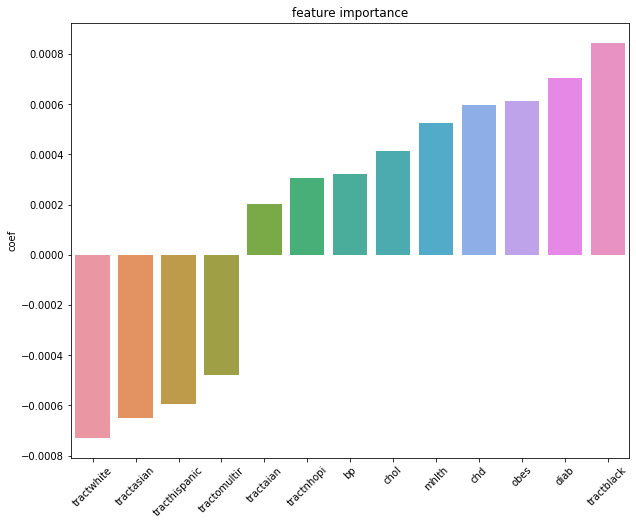

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x=coef.index, y=coef[0])
plt.ylabel('coef')
plt.title('feature importance')
plt.xticks(rotation=45);
# sns.barplot(x=df_small['status_2019'], y=df_small['tractblack'])
# plt.xticks(rotation=45);

In [ ]:
temp = df[race_cols+['food_desert_status']+['bp','chd', 'chol', 'diab', 'obes', 'mhlth']]

In [ ]:
temp['status_2019'] = df['status_2019']

/var/folders/jt/s7p01j9n62n0rvqd01ng02b00000gn/T/ipykernel_69873/3391448398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['status_2019'] = df['status_2019']


In [ ]:
temp.to_csv('../output_data/data_2019_dc_1and10_CDC_cleaned_small.csv')